<a href="https://colab.research.google.com/github/d1m3j1/Machine-Learning/blob/main/Breast_Cancer_using_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Breast Cancer Classification With Linear Classification**

In [2]:
import tensorflow as tf 
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
data = load_breast_cancer()

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
data.target_names


array(['malignant', 'benign'], dtype='<U9')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)
N, D = X_train.shape

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [9]:
#Build the model
model = tf.keras.models.Sequential([ 
  tf.keras.layers.Input(shape =(D, )),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics =['accuracy'])

#Train the model
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

#Evaluate the model - evaluate() returns loss and accuracy
print('Train Score:', model.evaluate(X_train, y_train))
print('Test Score:', model.evaluate(X_test, y_test))


Epoch 1/100
12/12 [==============================] - 1s 35ms/step - loss: 1.0899 - accuracy: 0.2965 - val_loss: 1.0582 - val_accuracy: 0.2979
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0384 - accuracy: 0.3249 - val_loss: 0.9680 - val_accuracy: 0.3936
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8990 - accuracy: 0.4213 - val_loss: 0.8875 - val_accuracy: 0.4362
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8288 - accuracy: 0.4853 - val_loss: 0.8159 - val_accuracy: 0.5319
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7661 - accuracy: 0.5582 - val_loss: 0.7532 - val_accuracy: 0.6117
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7346 - accuracy: 0.6045 - val_loss: 0.6982 - val_accuracy: 0.6809
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6657 - accuracy: 0.6768 - val_loss: 0.6504 - val_accuracy: 0.7287
Epoch 8/100


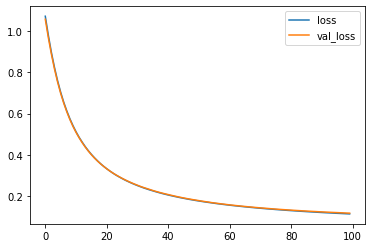

In [10]:
#Plot what's returned by model.fit()

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

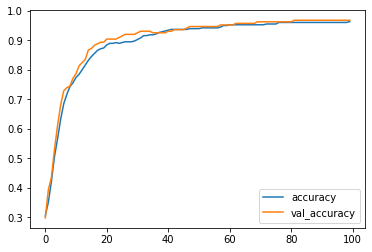

In [11]:
#Plot what's returned by model.fit()
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()


In [12]:
#Make Prediction
P = model.predict(X_test)
print(P)

[[9.96802449e-01]
 [8.14339817e-02]
 [1.45837665e-03]
 [1.74488425e-02]
 [1.68124557e-01]
 [9.91910756e-01]
 [2.08185434e-01]
 [2.02935934e-03]
 [7.24610925e-01]
 [1.71774626e-03]
 [9.71661448e-01]
 [4.69008386e-02]
 [1.32421672e-01]
 [9.88461018e-01]
 [9.46878612e-01]
 [8.34884167e-01]
 [3.27348709e-04]
 [9.71993923e-01]
 [8.15540552e-04]
 [9.62444544e-01]
 [9.68966961e-01]
 [9.91671503e-01]
 [9.66035843e-01]
 [9.70316231e-01]
 [9.90804970e-01]
 [9.89172935e-01]
 [8.27524006e-01]
 [9.84889448e-01]
 [9.61419582e-01]
 [9.98931289e-01]
 [9.97780681e-01]
 [9.98245537e-01]
 [4.14937735e-04]
 [9.50437367e-01]
 [9.80394959e-01]
 [9.37292576e-01]
 [3.57615054e-02]
 [8.36760044e-01]
 [5.37267387e-01]
 [4.50387388e-01]
 [6.26678586e-01]
 [9.97113824e-01]
 [7.92477369e-01]
 [9.78839874e-01]
 [9.20963287e-03]
 [6.06980503e-01]
 [6.65795524e-05]
 [1.22063190e-01]
 [9.95347679e-01]
 [9.99163508e-01]
 [9.21947777e-01]
 [9.95130241e-01]
 [8.80050421e-01]
 [9.90899622e-01]
 [9.88627672e-01]
 [9.743047

In [13]:
P = np.round(P).flatten()

In [14]:
print('Manually calculated accuracy:', np.mean(P == y_test))
print('EValuate output             :', model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9680851063829787
6/6 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.9681
EValuate output             : [0.11608115583658218, 0.9680851101875305]
